**Aim**
In this workshop, we show an example of how targeted analysis may help you to work out whether climate is 
1. changing in an area with a specific micro climate and
2. by what effects the climate change may be driven.

These have mostly been addressed in the talk. In addition, this workshop may improve your programming skills by a bit!

Basic tools are illustrated that can help you to make an assessment, but for robust conclusions, it is important to realize that further analysis will be needed: assessments of various types of observation series, climate models and theoretical assessment by experts. Furthermore, robustness of any conclusions increases with the length of measurements series (typically: at least 20-30 years of data needed, but sometimes more in particular cases).  

**Anomalies**
In a robust climate analysis, meteorologists and climate scientists ALWAYS use anomalies. An anomaly is a deviation of a weather variable from its reference value: the mean at a specific time of the year (often: a certain month). Thereby, a comparison is made to the long term mean, which is the reference value that the anomaly deviates from. Furthermore, if daily averages or extremes (i.e. maxima, minima) are not used, but for instance hourly values, an anomaly can also be calculated as deviation from the long term mean over this specific hour of the day and this specific time of the year. 

**Fair comparison**
If an anomaly is calculated for a series of observations, these should be derived from a time series at one site. However, if one calculates anomalies in a climate model, they should not be compared with those at an observation site according to many climate scientists. Instead, anomalies should be calculated for climate models and observation sites separately, using the same method. In studies using climate models, one should only compare the anomaly of model X with respect to its own mean at the same location. This anomaly contains useful information. If the state of another model Y is compared to the mean model X to calculate an anomaly, the comparison unfair. Only after following the right a procedure, one should ask questions like: how well are the anomalies of climate models linked with each other? How well are the anomalies of climate model X linked with observation series Z? 

**Time window**
If you calculate an anomaly, you have to select a time window to use. Choices can be to calculate the normal values for:
- Each month of the year
- 10 day fixed window (i.e. 1-10th of the month, 11-20th of the month, 20-28/29/30/31st of the month)
- 5 day fixed window
- Moving window covering 31 days (a day of the year, plus the 15 days before and the 15 days after)
- Seasonal means, usually over 3 months
- Other reasonable criteria

**Missing data**
If data a couple of observations are missing in a dataset, the dataset's gaps can be filled by various procedures. 
- For daily observations, the most reasonable way is to use anomaly data from a nearby (highly correlated) station with (ideally) a similar environment at the observation site. Ideally, calculate the anomalies over the same time windows (both historically and methodologically), to assure consistecy!
- For hourly observations, temporal interpolation of anomalies may be sufficient (if a few hours are missing only)
- If no comparable information is available at all, the "worst" option is to assume an anomaly of 0, or re-compute the available (e.g. mean) anomalies from the partially complete dataset (ignoring the missing values)
  
If large blocks of data are missing, the quality of statistics will rapidly decrease with an increasing size of the missing block, which inherently increases our uncertainty. In case exceedance statistics are calculated, a few missing data can already make them completely unreliable (as explained in the discussion).

Technically, you should typically recompute the normals and anomalies after gapfilling, which in sufficiently large datasets with very small gaps does not significantly impact the posterior anomalies. If you do not tackle this problem well or have too many missing records, you run into convergence issues and this would be a problem. However, this would mean that your measurement series is not providing robust observations.



**This exercise**
This exercise will show you how anomalies can be calculated from a dataset and show you options for gap filling of climate datasets.

In [3]:
#The following modules will be utilized to analyze our dataset! This is a comment in the code, opened with a hash #.
import netCDF4
import numpy as np
import xarray as xr
import matplotlib.pyplot as pl
#Set default font size to 18.
pl.rcParams["font.size"]=18

Now we can open our dataset:

In [4]:
data=xr.open_dataset("Stora_Sjofallet_series.nc")
## Note: should be a dataset where some values of climatology are missing! Then finally, when opening this one, we can check the differences in climatology from the various methods. 

The dataset has a very advanced structure. By calling just the dataset, we can identify its structure.

In [5]:
data

<xarray.Dataset>
Dimensions:        (time: 10106, day_of_year: 365)
Coordinates:
  * time           (time) float64 1.996e+07 1.996e+07 ... 2.023e+07 2.023e+07
    lat            float64 ...
    lon            float64 ...
    altitude       int64 ...
  * day_of_year    (day_of_year) int64 1 2 3 4 5 6 7 ... 360 361 362 363 364 365
Data variables: (12/23)
    TG             (time) float64 ...
    TX             (time) float64 ...
    TN             (time) float64 ...
    RR             (time) float64 ...
    DD             (time) float64 ...
    FG             (time) float64 ...
    ...             ...
    clim_mean_RR   (day_of_year) float64 ...
    clim_sigma_RR  (day_of_year) float64 ...
    clim_mean_RH   (day_of_year) float64 ...
    clim_sigma_RH  (day_of_year) float64 ...
    clim_mean_FG   (day_of_year) float64 ...
    clim_sigma_FG  (day_of_year) float64 ...
Attributes:
    Reference:       Klein Tank, A.M.G. and Coauthors, 2002. Daily dataset of...
    Station_wmo_id:  02024
    SMHI url:        https://www.smhi.se/vader/observationer/observationer#st...
    Url:             https://www.ecad.eu/dailydata/customquery.php

The structure is shown as a summary. Here we can see the following: the dataset has two dimensions. The first one is time, with 10106 index values. These are days: 10106 consecutive days are covered by our daily dataset of observations. It contains daily mean values and the extremes of temperature.

Furthermore, there is an index day_of_year, which will allow us to calculate statistics by day of the year. 
Lastly, there are three coordinates without indices: latitude ("lat"), longitude ("lon") and altitude, which is permitted, since they have a single value only.

Then, there is shown that we have 23 variables. These are: TX - maximum daily temperature, TN - minimum daily temperature, TG - mean of daily temperature, RR - rainfall or snowfall accumulation for each day, RH - daily mean relative humidity, DD - dominant wind direction, in degrees: 0 and 360 are winds from the north, 90 from the east, 180 from the south and 270 from the west; lastly, daily mean wind speed FG. 

Their mean daily values over 31 day windows have also been computed, as well as their standard deviations: the square root of their mean squared deviations from the mean. These are called clim_mean_XX and clim_sigma_XX. We will use these series in the following analysis exercise and use some other calculation methods to compute apparently representatitve means.



**We will for now focus on temperature measurements.**

So, in the following, we calculate the mean daily temperature and the daily temperature extremes averaged over the full daily measurement series (of about 26 years only, about the minimum for robust climate analysis!), but for each day of the year separately. 

Then we will plot this series and compare it to two other time windowing methods:
* one month windows
* running 31 day windows (mean of ?day X +  one to 15 days before + one to 15 days after)

We will also inspect differences between them and the anomalies with respect to them.

In [6]:
# Inititation of data storage for mean daily TG, TX, TN
meanTNdaily=np.zeros(len(data["day_of_year"]))
meanTXdaily=np.zeros(len(data["day_of_year"]))
meanTGdaily=np.zeros(len(data["day_of_year"]))

# Calculation of means for each day of the year, 1-365 (Python uses indices 0-364). Dates on each day of the year are selected to average over ("==")
for i in np.arange(len(meanTNdaily)):
    meanTNdaily[i]=np.mean(data["TN"][data["doy"]==(i+1)])
    meanTGdaily[i]=np.mean(data["TG"][data["doy"]==(i+1)])
    meanTXdaily[i]=np.mean(data["TX"][data["doy"]==(i+1)])

# Array with day numbers belonging to each TG/TX/TN
days=np.arange(len(meanTNdaily))+1

Now we can start plotting the values that we have obtained!

The dataset has already been prepared with values of "clim_mean_XX", which we will make use of!

We will plot them together now.

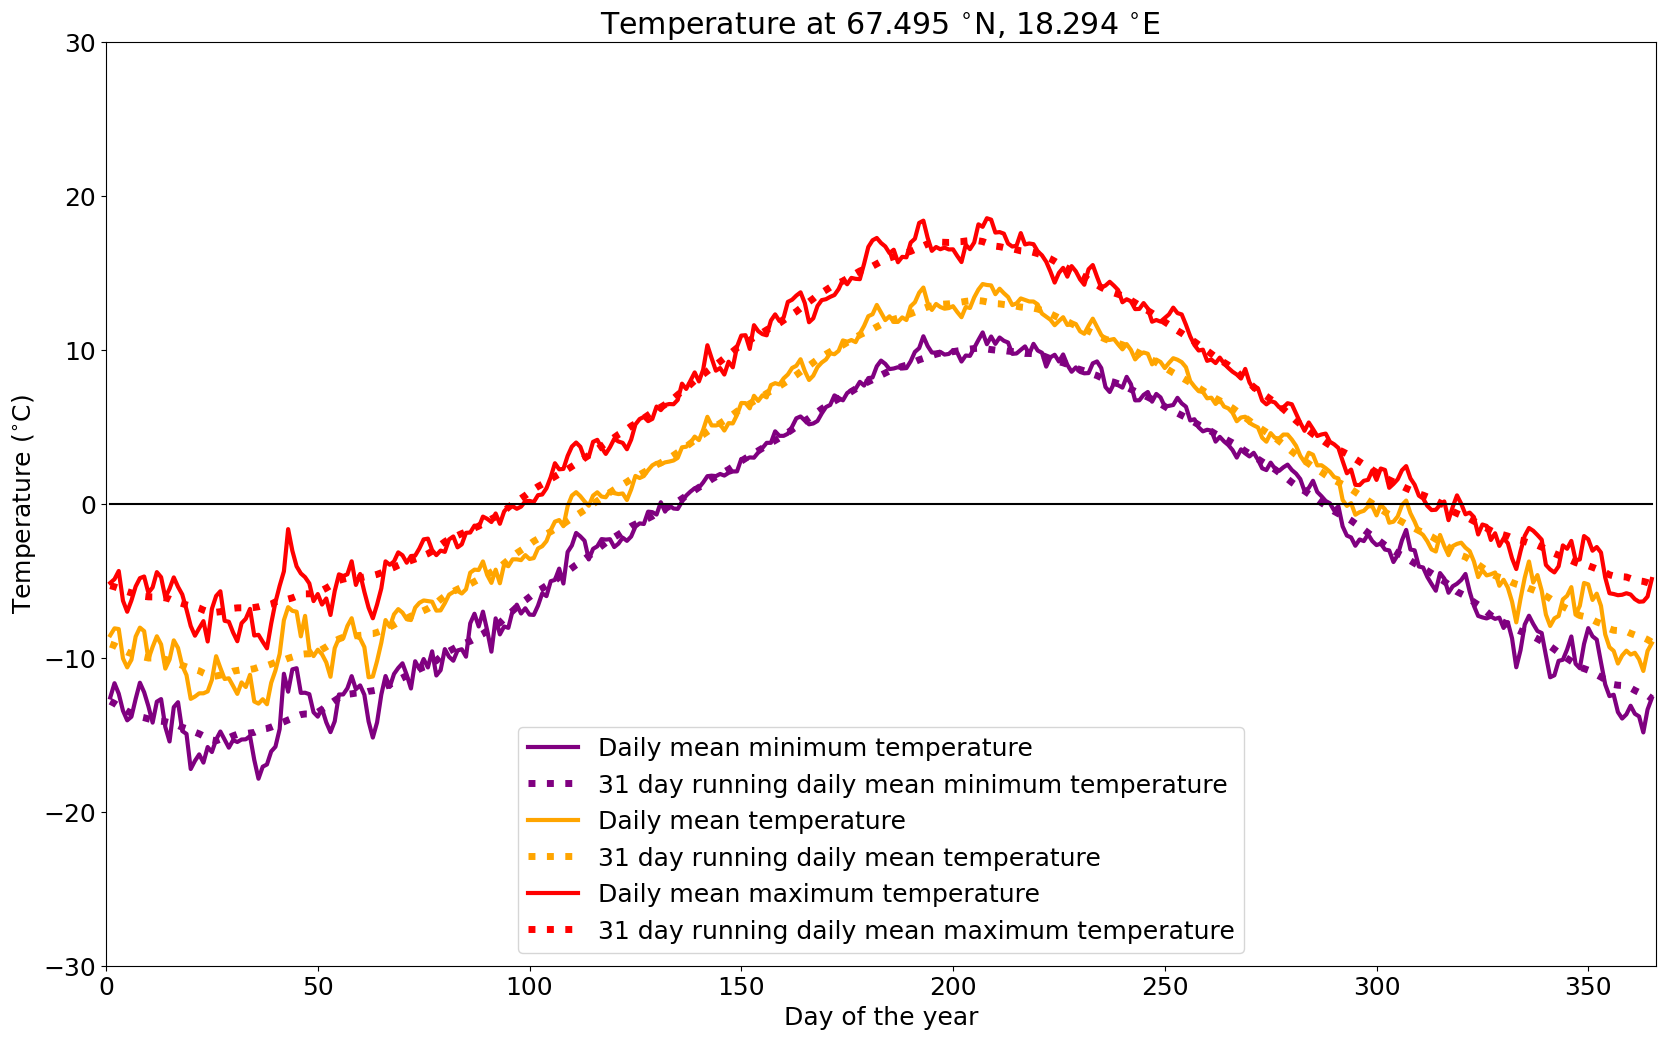

In [7]:
# Initiate figure
pl.figure(figsize=(20,12))

# Plot both daily means and moving window means of minimum temperature
pl.plot(days,meanTNdaily,color="purple",lw=3,label="Daily mean minimum temperature")
pl.plot(days,data["clim_mean_TN"].values,color="purple",ls=":",lw=5,label="31 day running daily mean minimum temperature")

# Same for mean daily temperature and maximum temperature
pl.plot(days,meanTGdaily,color="orange",lw=3,label="Daily mean temperature")
pl.plot(days,data["clim_mean_TG"].values,color="orange",ls=":",lw=5,label="31 day running daily mean temperature")
pl.plot(days,meanTXdaily,color="red",lw=3,label="Daily mean maximum temperature")
pl.plot(days,data["clim_mean_TX"].values,color="red",ls=":",lw=5,label="31 day running daily mean maximum temperature")

# Add a reference line at 0, legend and select a nice window
pl.plot(days,np.zeros(len(days)),color="black")
pl.legend()
pl.ylim(-30,30)
pl.xlim(0,366)

# Set nice titles for axes and plot
pl.ylabel(r"Temperature ($^{\circ}$C)")
pl.xlabel("Day of the year")
pl.title("Temperature at "+str(data["lat"].values)+r" $^{\circ}$N, "+str(data["lon"].values)+r" $^{\circ}$E ")
pl.show()

**Question 1**
Why is there such a large wobble between about day 40 and day 50 in the daily mean maximum and minimum temperatures? What does this say about the averaging method?
Also, estimate the magnitude of these wobbles. 

Now we will select blocks of one month carry out the same averaging procedure as we previously did by day of the year. 

In [8]:
# Inititation of data storage for mean monthly TG, TX, TN
nmonths=12
meanTNmonthly=np.zeros(nmonths)
meanTXmonthly=np.zeros(nmonths)
meanTGmonthly=np.zeros(nmonths)

# Calculation of means for each month of the year. 
for i in np.arange(nmonths):
    meanTNmonthly[i]=np.mean(data["TN"][data["month"]==(i+1)])
    meanTGmonthly[i]=np.mean(data["TG"][data["month"]==(i+1)])
    meanTXmonthly[i]=np.mean(data["TX"][data["month"]==(i+1)])

# Also, definitition of some indice labels in the dataset to perform selection over the first and last full year available.
first_full_year=np.arange(306,671)
last_full_year=-first_full_year[::-1]+1

# Create an array with the month in which each day of a year falls
daysmonth=np.int32(data["month"][first_full_year])

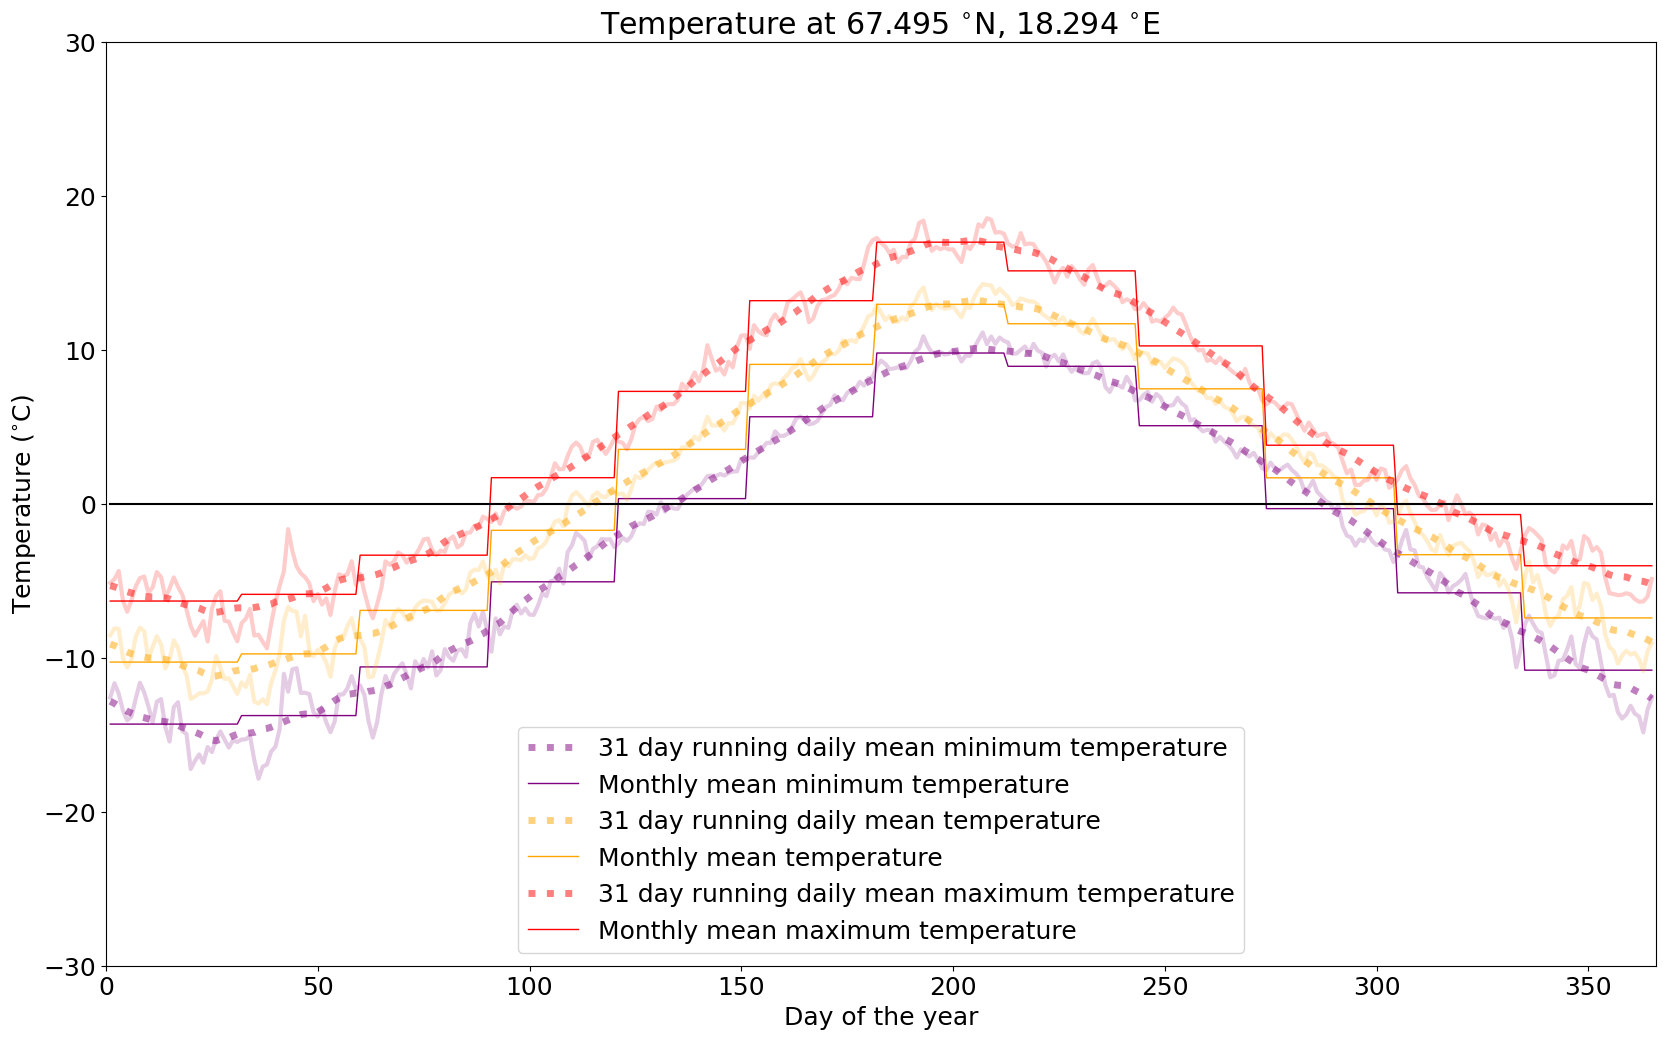

In [9]:
# Again, plot some nice figure, now including the mean monthly values
pl.figure(figsize=(20,12))
pl.plot(days,meanTNdaily,color="purple",lw=3,alpha=0.2)
pl.plot(days,data["clim_mean_TN"].values,color="purple",ls=":",lw=5,label="31 day running daily mean minimum temperature",alpha=0.5)
pl.plot(days,meanTNmonthly[daysmonth-1],color="purple",lw=1,label="Monthly mean minimum temperature")
pl.plot(days,meanTGdaily,color="orange",lw=3,alpha=0.2)
pl.plot(days,data["clim_mean_TG"].values,color="orange",ls=":",lw=5,label="31 day running daily mean temperature",alpha=0.5)
pl.plot(days,meanTGmonthly[daysmonth-1],color="orange",lw=1,label="Monthly mean temperature")
pl.plot(days,meanTXdaily,color="red",lw=3,alpha=0.2)
pl.plot(days,data["clim_mean_TX"].values,color="red",ls=":",lw=5,label="31 day running daily mean maximum temperature",alpha=0.5)
pl.plot(days,meanTXmonthly[daysmonth-1],color="red",lw=1,label="Monthly mean maximum temperature")
pl.plot(days,np.zeros(len(days)),color="black")
pl.legend()
pl.ylim(-30,30)
pl.xlim(0,366)
pl.ylabel(r"Temperature ($^{\circ}$C)")
pl.xlabel("Day of the year")
pl.title("Temperature at "+str(data["lat"].values)+r" $^{\circ}$N, "+str(data["lon"].values)+r" $^{\circ}$E ")
pl.show()


**Question 2**
Can you explain the disadvantage of monthly values to derive anomalies from? How does it compare to a moving window? 
What magnitude of deviations do you expect from the optimal method?

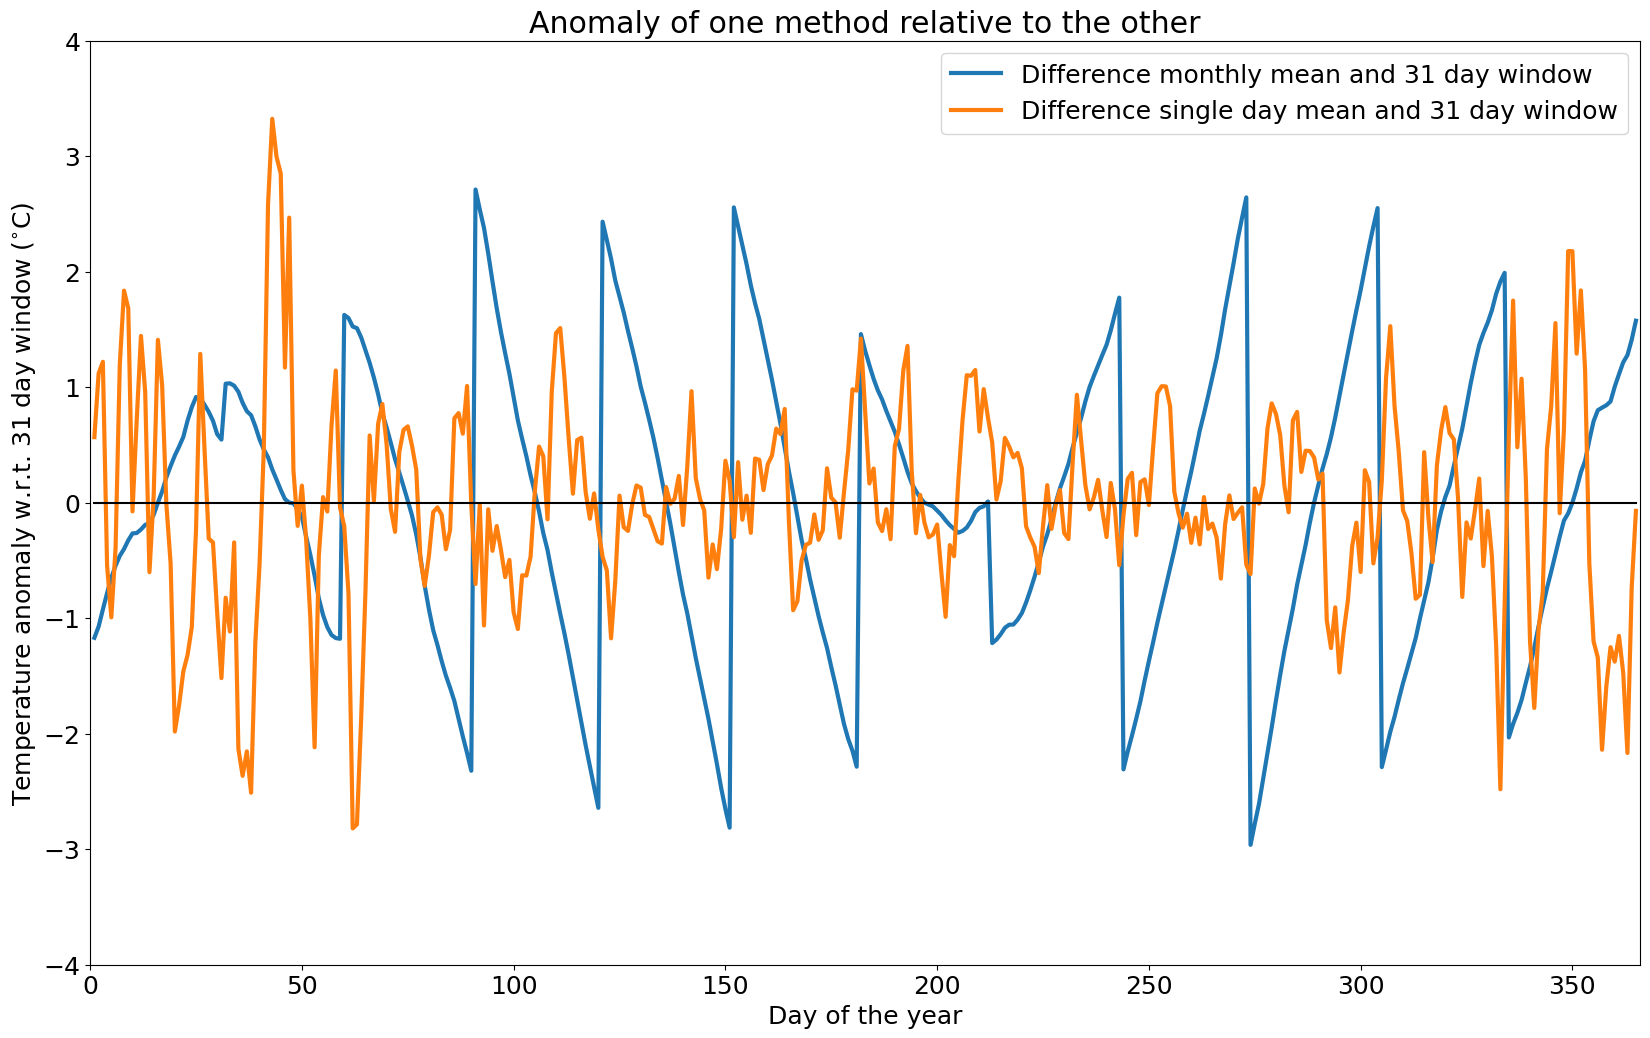

In [10]:
# Now we will plot the differences between the earlier three series in two difference plots, with a nice lay-out
# So we will subtract the mean values (on a day or a month) from the 31 window running means, as selected in the code below.
# For any full year selection, this will lead to the same result
pl.figure(figsize=(20,12))
pl.title("Anomaly of one method relative to the other")
pl.plot(days,meanTGmonthly[np.int32(data["month"]-1)][first_full_year]-data["clim_mean_TG"][data["doy"]-1][first_full_year],label="Difference monthly mean and 31 day window",lw=3)
pl.plot(days,meanTGdaily-data["clim_mean_TG"][data["doy"]-1][first_full_year],label="Difference single day mean and 31 day window",lw=3)
pl.ylabel(r"Temperature anomaly w.r.t. 31 day window ($^{\circ}$C)")
pl.xlabel("Day of the year")
pl.plot(days,np.zeros(len(days)),color="black")
pl.ylim(-4,4)
pl.xlim(0,366)
pl.legend()

**Question 3** 
What pattern is really remarkable in the above graph? Why does it exist? 
Can you also describe the other pattern that can be identified, how are the two curves characterized?

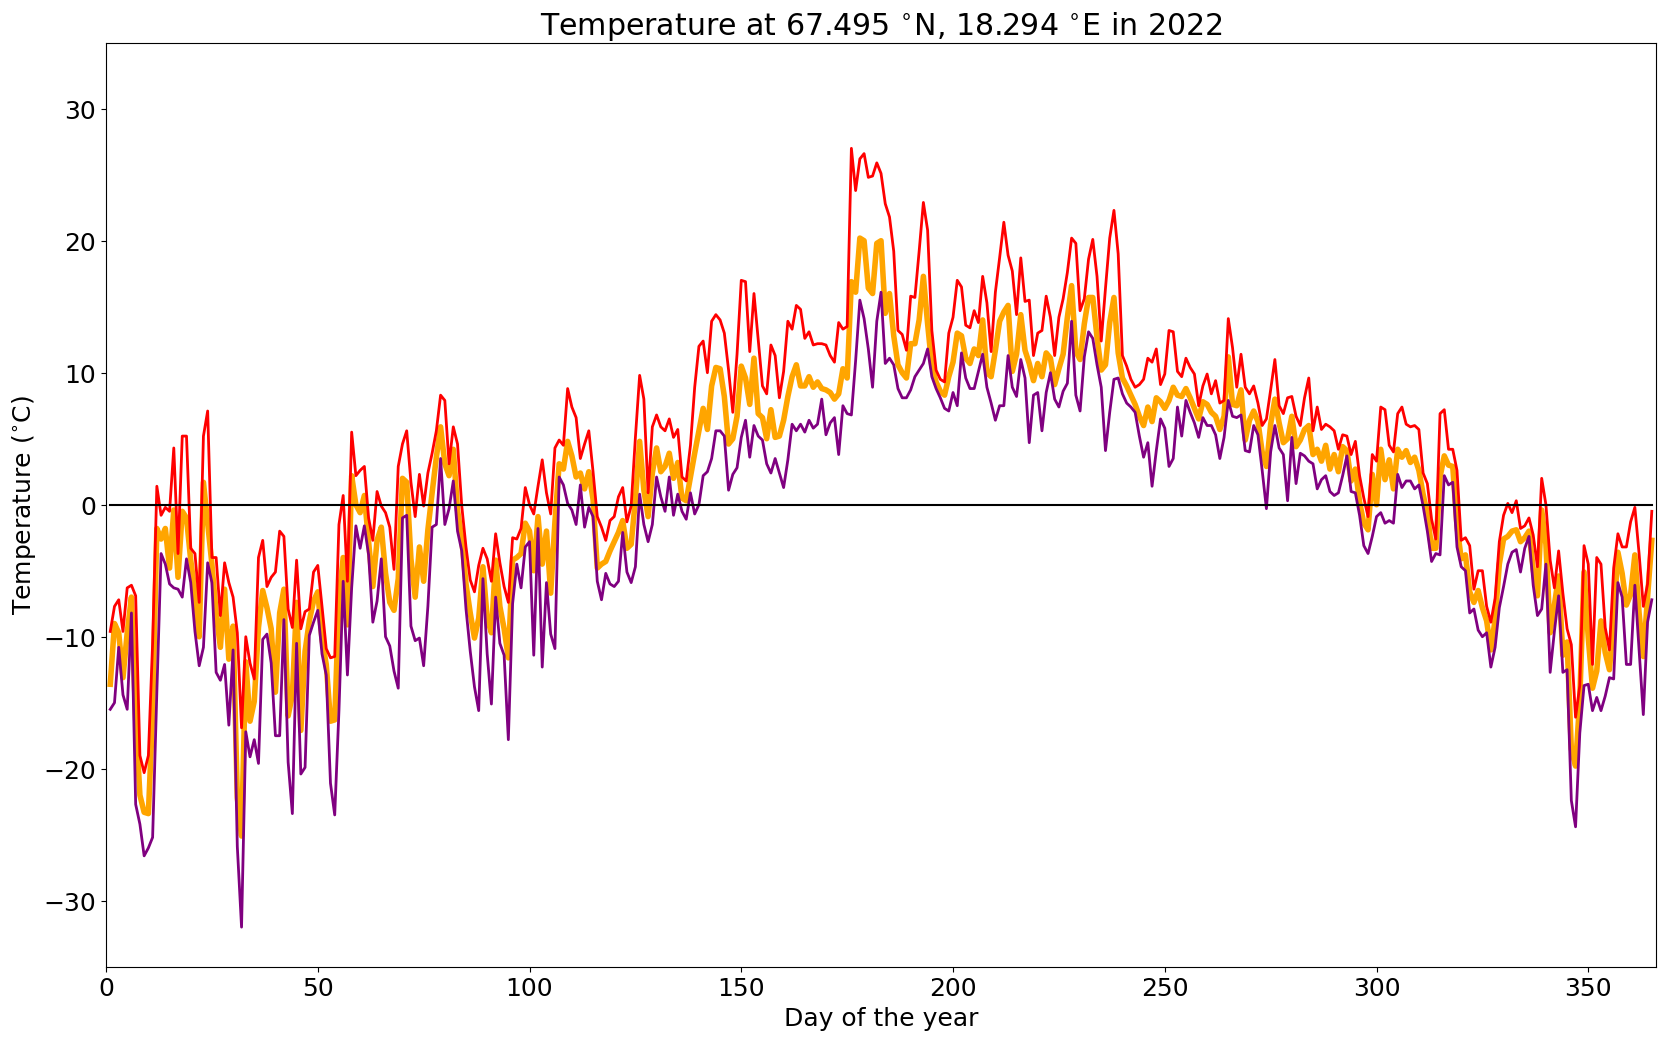

In [11]:
#Now we select the daily temperature series of the last full year to analyze in a plot. 
pl.figure(figsize=(20,12))
pl.title("Temperature at "+str(data["lat"].values)+r" $^{\circ}$N, "+str(data["lon"].values)+r" $^{\circ}$E in "+str(np.mean(data["year"].values[last_full_year],dtype="int")))
pl.plot(days,data["TG"][last_full_year],lw=4,color="orange")
pl.plot(days,data["TX"][last_full_year],lw=2,color="red")
pl.plot(days,data["TN"][last_full_year],lw=2,color="purple")
pl.ylabel(r"Temperature ($^{\circ}$C)")
pl.xlabel("Day of the year")
pl.xlim(0,366)
pl.ylim(-35,35)
pl.plot(days,np.zeros(len(days)),color="black")

**Question 4**
Which days in this year do seem to have the largest anomalies in this particular year, both cold and warm?
Have a discussion on why this would be the case!

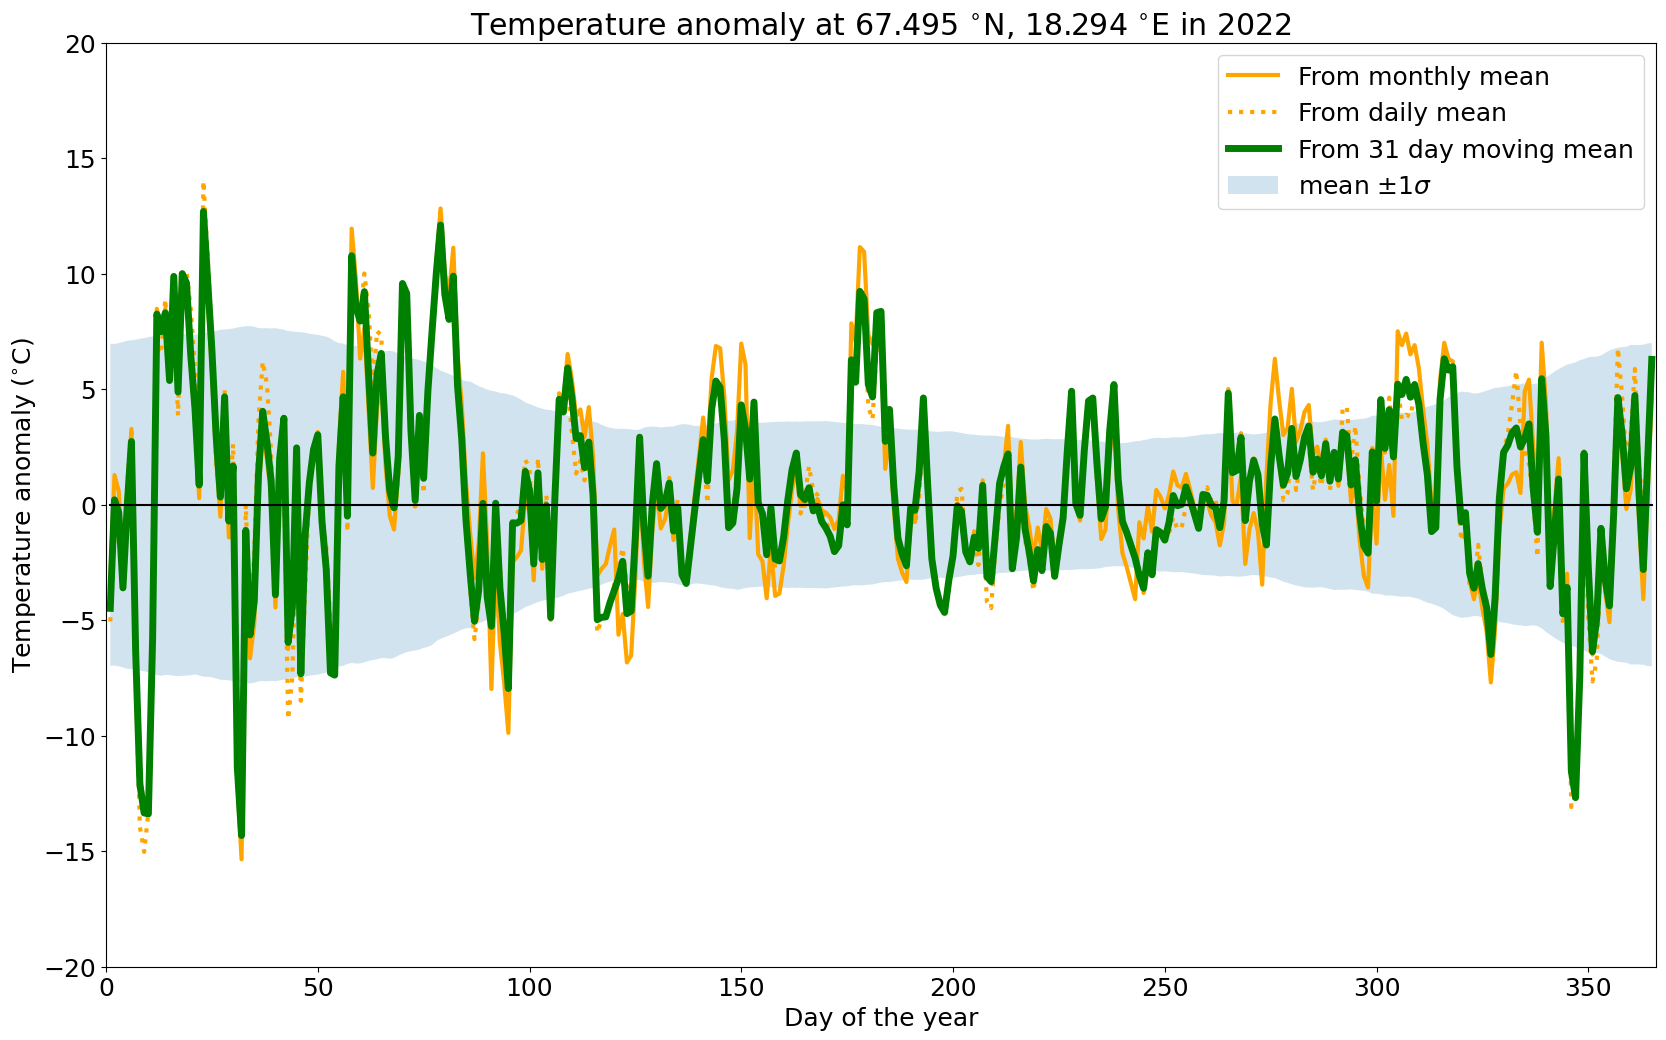

In [12]:
#Now we are gonna subtract the climatological values from the actual temperature series of this particular year
#We will find which days have the largest anomalies!
#Also, we will add the general band of standard deviations around the mean, which helps us understanding the local climate better!

#Here, anomalies are used from all of the earlier methods! So the plot is generated three times!
pl.figure(figsize=(20,12))
pl.title("Temperature anomaly at "+str(data["lat"].values)+r" $^{\circ}$N, "+str(data["lon"].values)+r" $^{\circ}$E in "+str(np.mean(data["year"].values[last_full_year],dtype="int")))

pl.plot(days,data["TG"][last_full_year]-meanTGmonthly[np.int32(data["month"]-1)][last_full_year],lw=3,color="orange",label="From monthly mean")
pl.plot(days,data["TG"][last_full_year]-meanTGdaily,lw=3,ls=":",color="orange",label="From daily mean")
pl.plot(days,data["TG"][last_full_year]-data["clim_mean_TG"][data["doy"]-1][last_full_year],lw=5,color="green",label="From 31 day moving mean")
pl.plot(days,np.zeros(len(days)),color="black")
pl.ylabel(r"Temperature anomaly ($^{\circ}$C)")
pl.xlabel("Day of the year")
pl.ylim(-20,20)
pl.xlim(0,366)
pl.fill_between(days,data["clim_sigma_TG"][data["doy"]-1][last_full_year],-data["clim_sigma_TG"][data["doy"]-1][last_full_year],alpha=0.2,label=r"mean $\pm 1\sigma$")
pl.legend()

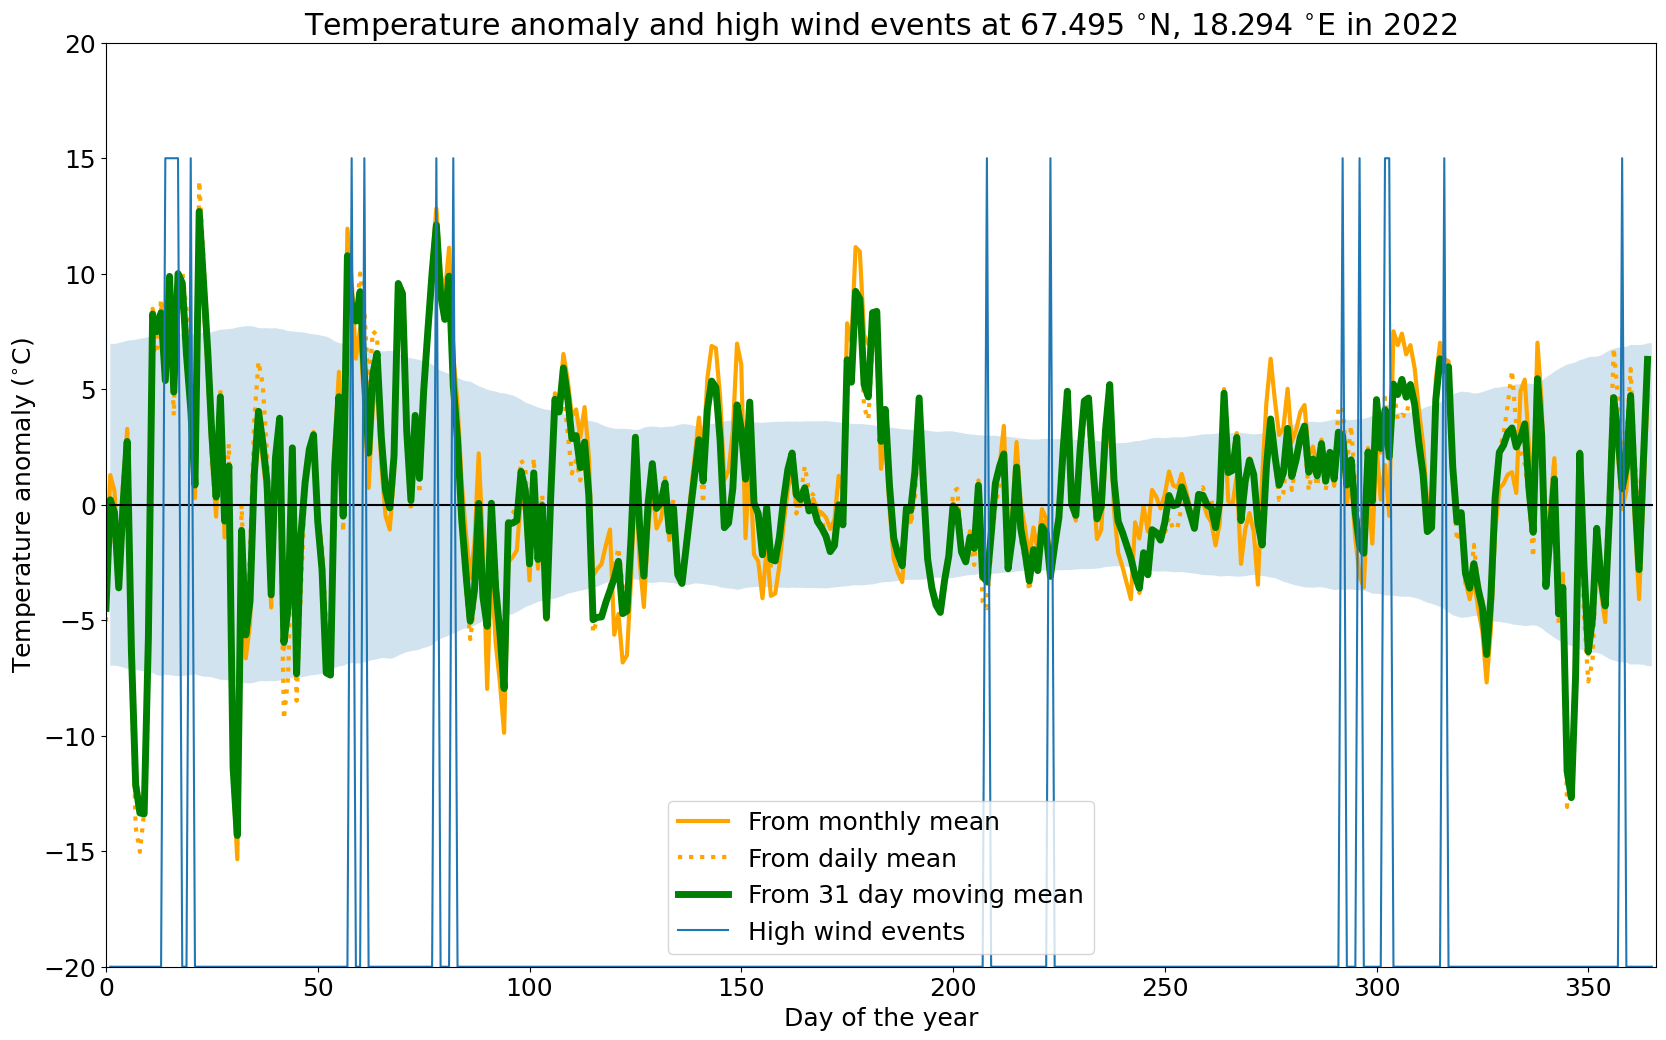

In [13]:
#We can add the wind events with daily mean winds over a specified thershold.
pl.figure(figsize=(20,12))
windthres=14
pl.title("Temperature anomaly and high wind events at "+str(data["lat"].values)+r" $^{\circ}$N, "+str(data["lon"].values)+r" $^{\circ}$E in "+str(np.mean(data["year"].values[last_full_year],dtype="int")))

pl.plot(data["TG"][last_full_year]-meanTGmonthly[np.int32(data["month"]-1)][last_full_year],lw=3,color="orange",label="From monthly mean")
pl.plot(data["TG"][last_full_year]-meanTGdaily,lw=3,ls=":",color="orange",label="From daily mean")
pl.plot(data["TG"][last_full_year]-data["clim_mean_TG"][data["doy"]-1][last_full_year],lw=5,color="green",label="From 31 day moving mean")
pl.plot(days,np.zeros(len(days)),color="black")
pl.ylabel(r"Temperature anomaly ($^{\circ}$C)")
pl.xlabel("Day of the year")
pl.ylim(-20,20)
pl.xlim(0,366)
pl.fill_between(days,data["clim_sigma_TG"][data["doy"]-1][last_full_year],-data["clim_sigma_TG"][data["doy"]-1][last_full_year],alpha=0.2)
pl.plot(days,-20+(data["FG"][last_full_year]>windthres)*35,label="High wind events")
pl.legend()

**Question 5** 
What are the temperature characteristics of a high wind event in this climate, and why?

[[1.         0.97933007]
 [0.97933007 1.        ]]
[[1.         0.95851906]
 [0.95851906 1.        ]]


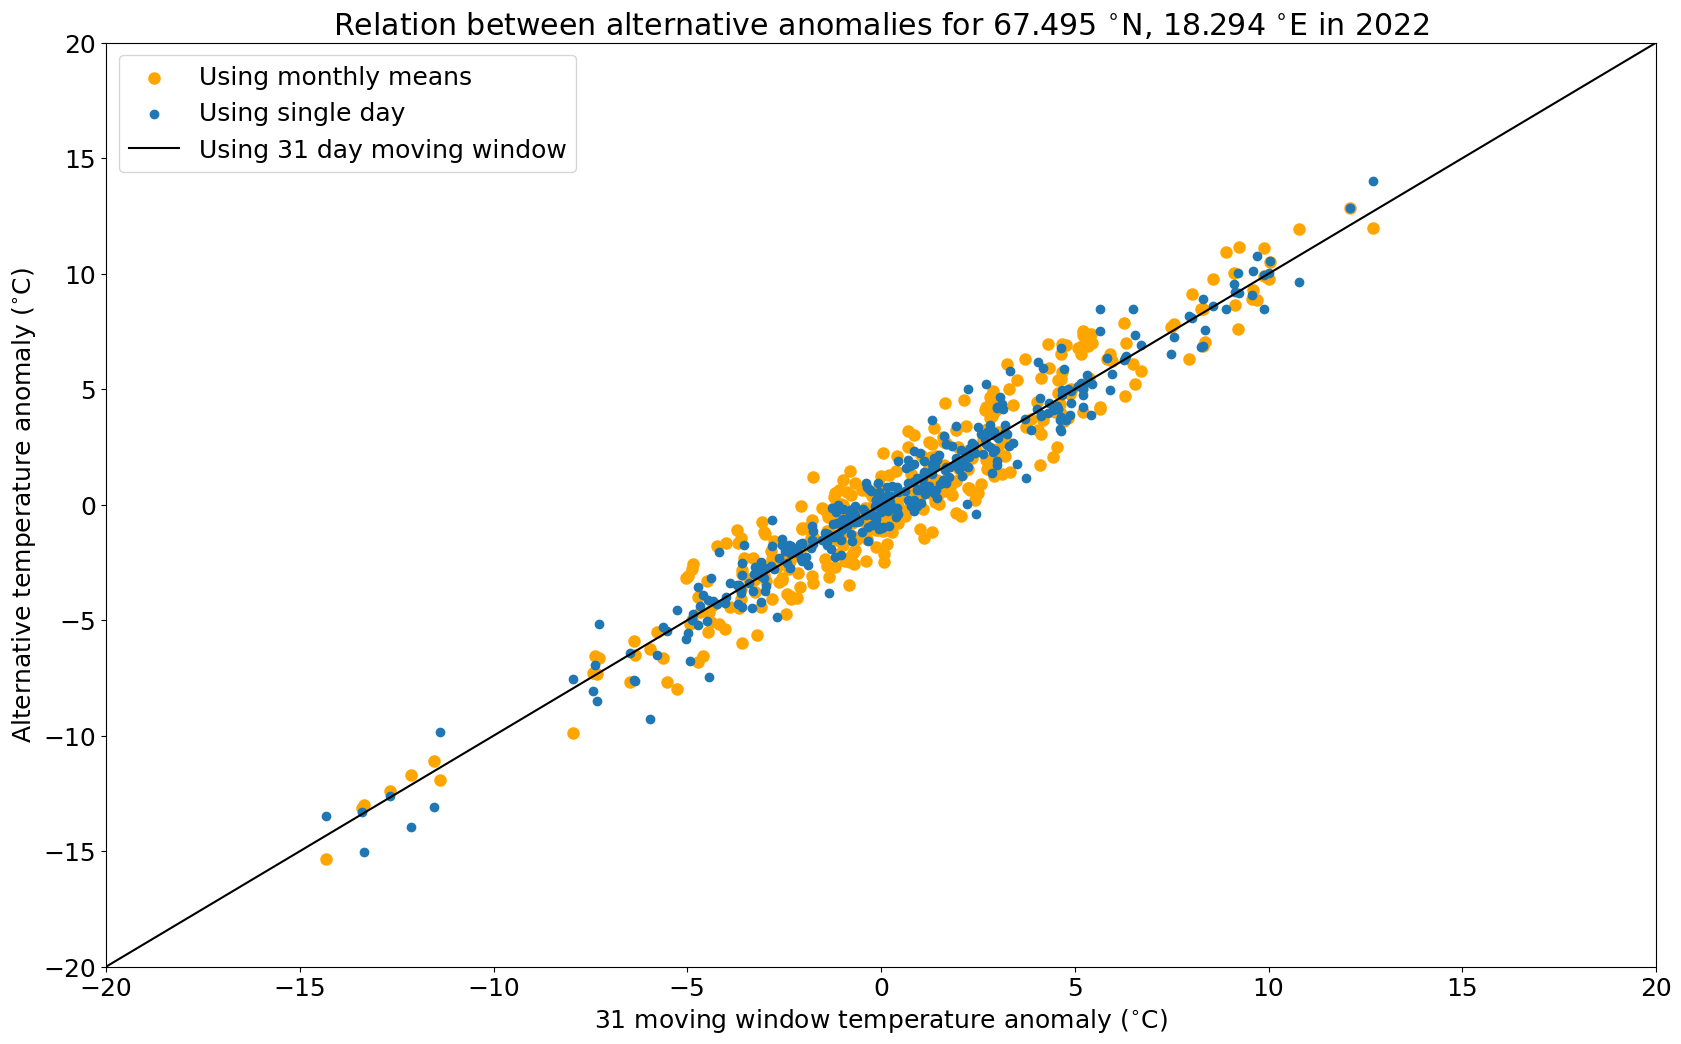

In [14]:
# Now we will compare anomalies from the three methods among each other for this particular year. 
pl.figure(figsize=(20,12))
pl.scatter((data["TG"][last_full_year]-data["clim_mean_TG"][data["doy"]-1][last_full_year]),(data["TG"][last_full_year]-meanTGmonthly[np.int32(data["month"]-1)][last_full_year]),lw=3,color="orange",label="Using monthly means")
pl.scatter((data["TG"][last_full_year]-data["clim_mean_TG"][data["doy"]-1][last_full_year]),data["TG"][last_full_year]-meanTGdaily,label="Using single day")
pl.plot(np.array([-20,20]),np.array([-20,20]),color="black",label="Using 31 day moving window")
pl.xlim(-20,20)
pl.ylim(-20,20)
pl.title("Relation between alternative anomalies for "+str(data["lat"].values)+r" $^{\circ}$N, "+str(data["lon"].values)+r" $^{\circ}$E in "+str(np.mean(data["year"].values[last_full_year],dtype="int")))

pl.legend()
pl.xlabel(r"31 moving window temperature anomaly ($^{\circ}$C)")
pl.ylabel("Alternative temperature anomaly ($^{\circ}$C)")
print(np.corrcoef((data["TG"][last_full_year]-data["clim_mean_TG"][data["doy"]-1][last_full_year]),data["TG"][last_full_year]-meanTGdaily))
print(np.corrcoef((data["TG"][last_full_year]-data["clim_mean_TG"][data["doy"]-1][last_full_year]),(data["TG"][last_full_year]-meanTGmonthly[np.int32(data["month"]-1)][last_full_year])))

**Question 6** 
What is the preffered method to use for anomaly computations?

**Question 7**
Do you think the relation between the different methods justifies the alternative two? (When and when not?)

Text(0, 0.5, 'Alternative temperature anomaly ($^{\\circ}$C)')

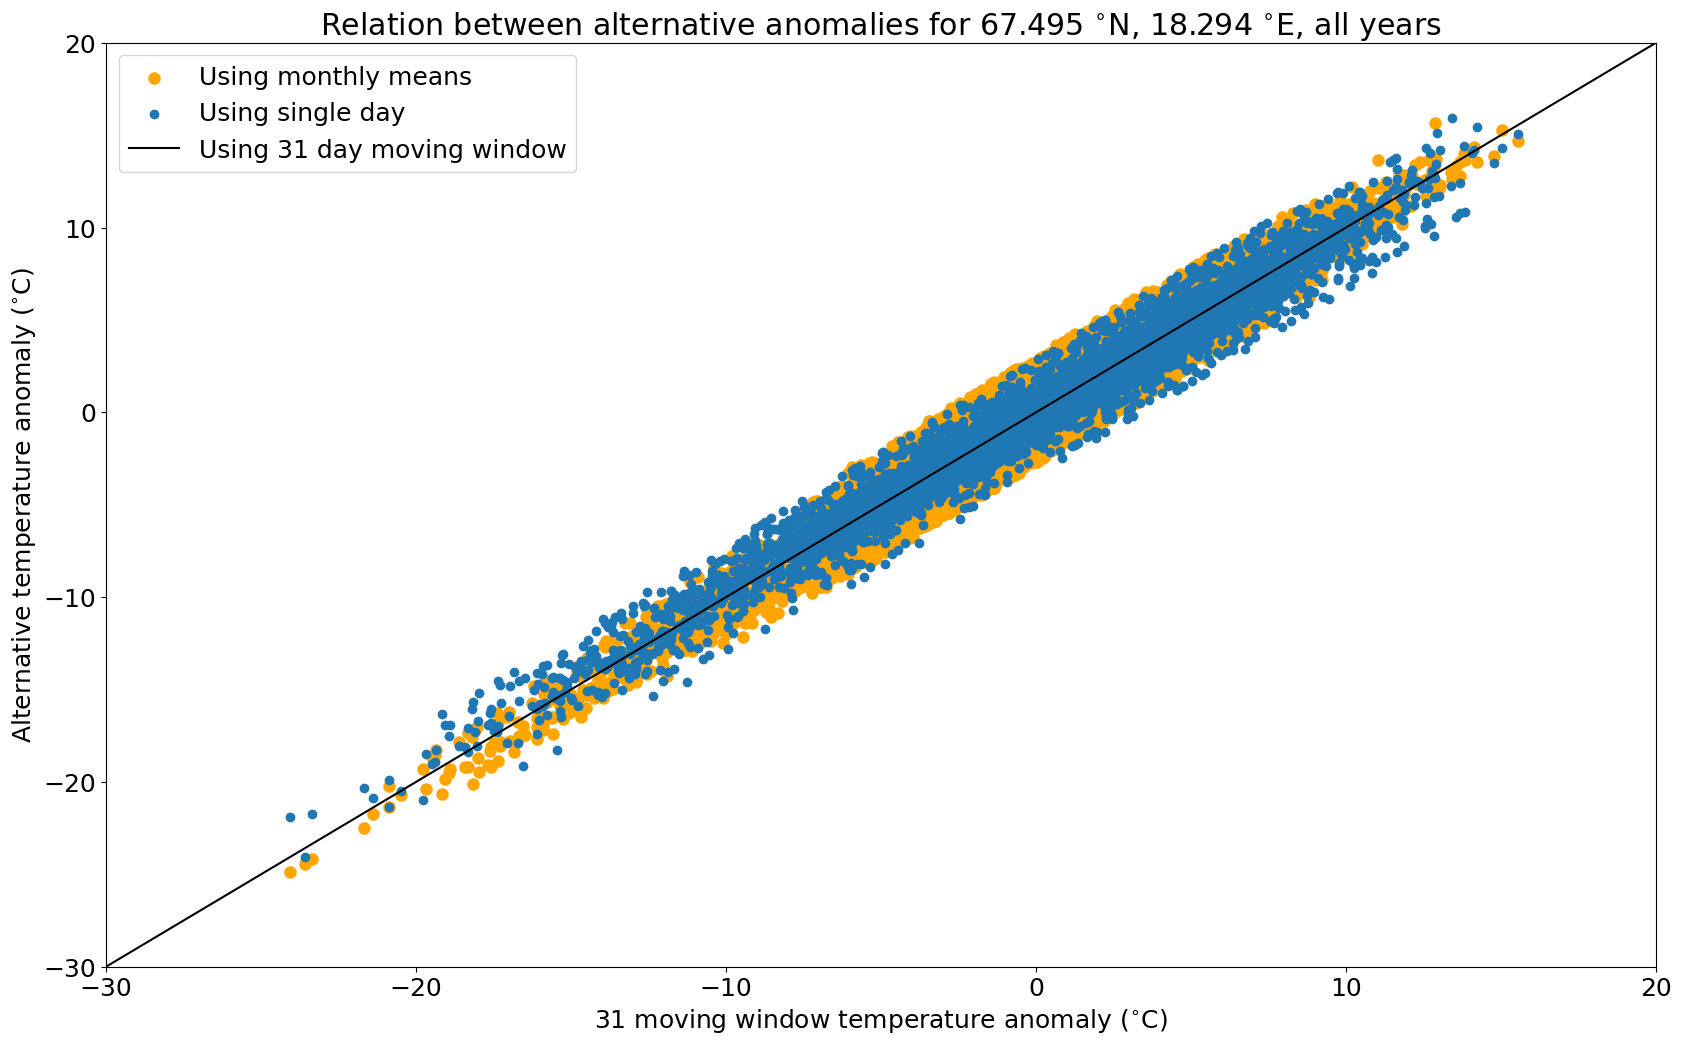

In [15]:
#We can also compute the full series of all available years and compare the three methods.
pl.figure(figsize=(20,12))
pl.scatter((data["TG"][:]-data["clim_mean_TG"][data["doy"]-1][:]),(data["TG"][:]-meanTGmonthly[np.int32(data["month"]-1)][:]),lw=3,color="orange",label="Using monthly means")
pl.scatter((data["TG"][:]-data["clim_mean_TG"][data["doy"]-1][:]),data["TG"][:]-meanTGdaily[np.int32(data["doy"][:]-1)][:],label="Using single day")
pl.plot(np.array([-30,20]),np.array([-30,20]),color="black",label="Using 31 day moving window")
pl.xlim(-30,20)
pl.ylim(-30,20)
pl.title("Relation between alternative anomalies for "+str(data["lat"].values)+r" $^{\circ}$N, "+str(data["lon"].values)+r" $^{\circ}$E, all years")

pl.legend()
pl.xlabel(r"31 moving window temperature anomaly ($^{\circ}$C)")
pl.ylabel("Alternative temperature anomaly ($^{\circ}$C)")


A few remarkable characteristics that can be seen from the previous four plots.
* The deviations from the mean are a lot larger in winter than in summer. This can easily be appreciated from the shading of the standard deviations from the mean!
* The difference between maximum daily temperature and minimum daily temperature is often much larger in summer than in winter and autumn.
* High wind has a recognizable impact on temperature, moving it towards the annual mean (high wind in summer: cold anomalies, high wind in winter: warm anomalies)
  
In addition:
* Note that the difference between the various anomalies is substantial at some days: for example around days 300 and 305!
  
On the latter, we can zoom in:

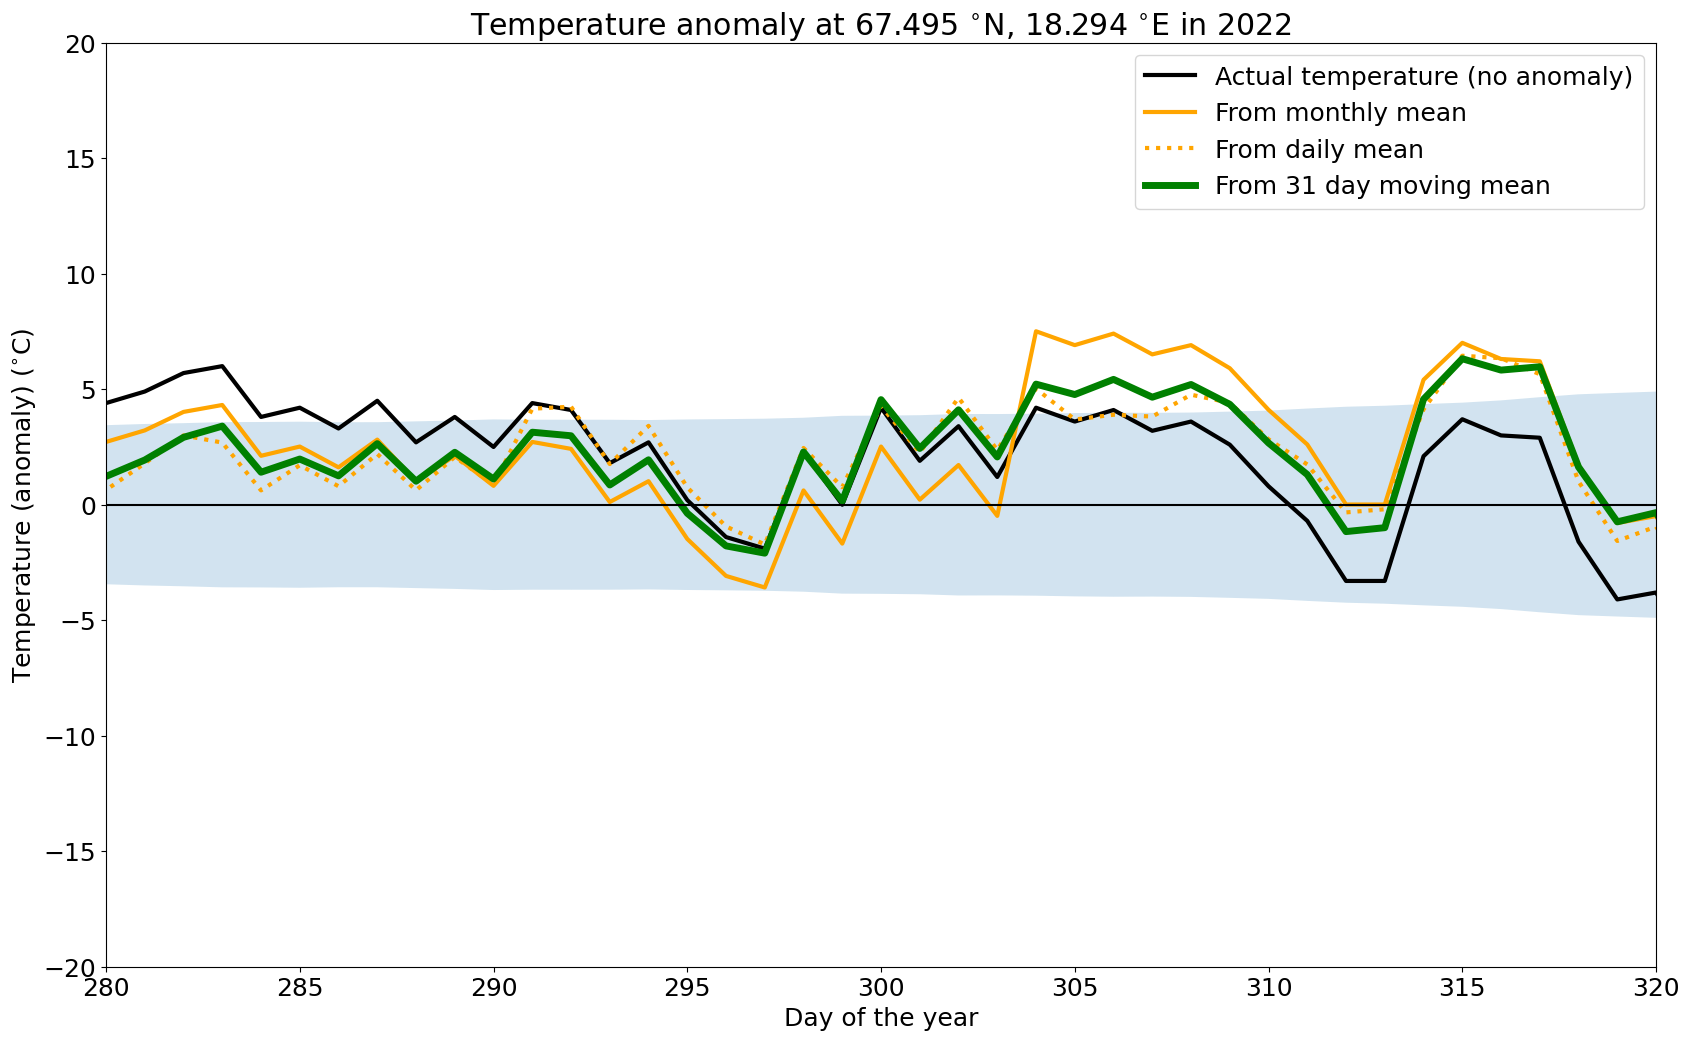

In [16]:
#We reproduce the same plot, but with a 40 day window selected.
#Once more we add the temperature in black, on top of three methods to compute their anomalies
pl.figure(figsize=(20,12))
pl.title("Temperature anomaly at "+str(data["lat"].values)+r" $^{\circ}$N, "+str(data["lon"].values)+r" $^{\circ}$E in "+str(np.mean(data["year"].values[last_full_year],dtype="int")))
pl.plot(data["TG"][last_full_year],lw=3,color="black",label="Actual temperature (no anomaly)")
pl.plot(data["TG"][last_full_year]-meanTGmonthly[np.int32(data["month"]-1)][last_full_year],lw=3,color="orange",label="From monthly mean")
pl.plot(data["TG"][last_full_year]-meanTGdaily,lw=3,ls=":",color="orange",label="From daily mean")
pl.plot(data["TG"][last_full_year]-data["clim_mean_TG"][data["doy"]-1][last_full_year],lw=5,color="green",label="From 31 day moving mean")
pl.plot(days,np.zeros(len(days)),color="black")
pl.ylabel(r"Temperature (anomaly) ($^{\circ}$C)")
pl.xlabel("Day of the year")
pl.ylim(-20,20)
pl.xlim(280,320)
pl.fill_between(days,data["clim_sigma_TG"][data["doy"]-1][last_full_year],-data["clim_sigma_TG"][data["doy"]-1][last_full_year],alpha=0.2)
pl.legend()

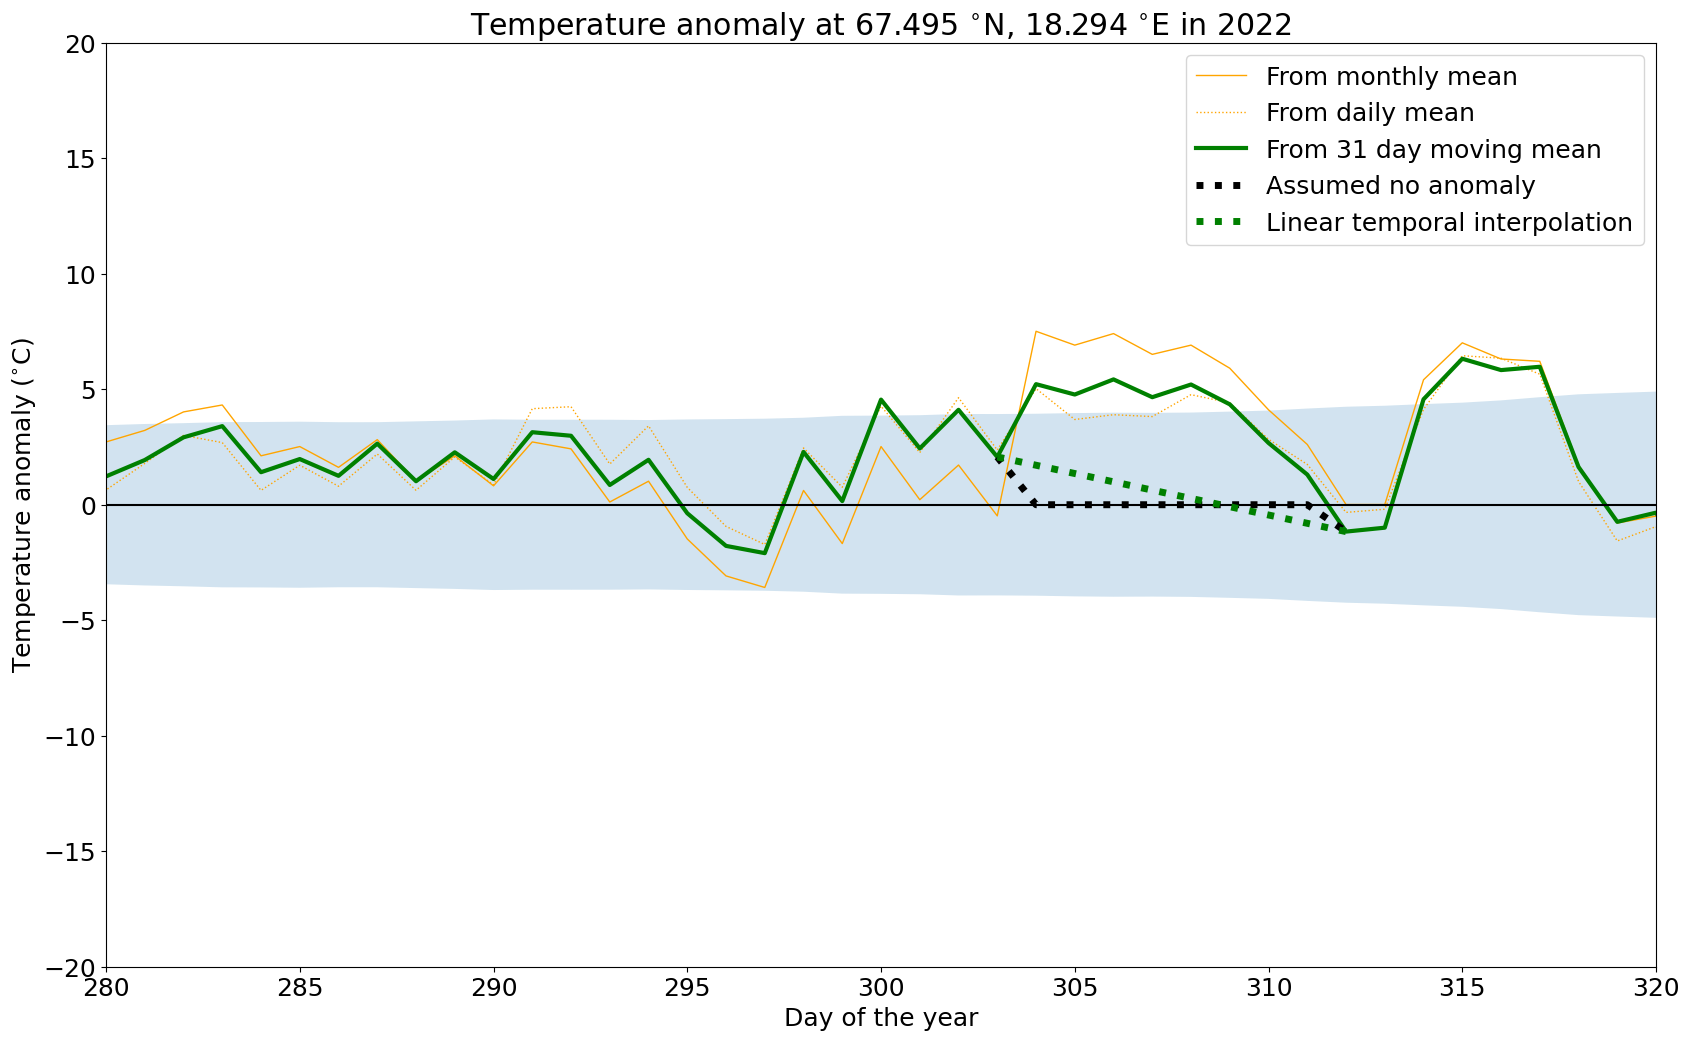

In [19]:
pl.figure(figsize=(20,12))

ndays_off=9
dnum1=303
dnum2=dnum1+ndays_off
pl.title("Temperature anomaly at "+str(data["lat"].values)+r" $^{\circ}$N, "+str(data["lon"].values)+r" $^{\circ}$E in "+str(np.mean(data["year"].values[last_full_year],dtype="int")))
pl.plot(data["TG"][last_full_year]-meanTGmonthly[np.int32(data["month"]-1)][last_full_year],lw=1,color="orange",label="From monthly mean")
pl.plot(data["TG"][last_full_year]-meanTGdaily,lw=1,ls=":",color="orange",label="From daily mean")
pl.plot(data["TG"][last_full_year]-data["clim_mean_TG"][data["doy"]-1][last_full_year],lw=3,color="green",label="From 31 day moving mean")
pl.plot(days,np.zeros(len(days)),color="black")
pl.plot(np.array([dnum1,dnum1+1,dnum2-1,dnum2]),np.array([data["TG"][last_full_year[dnum1]]-data["clim_mean_TG"][dnum1],0,0,data["TG"][last_full_year[dnum2]]-data["clim_mean_TG"][dnum2]]),color="black",ls=":",label="Assumed no anomaly",lw=5)
### Add file with anomalies for Ritsem on those dates!!
pl.plot(np.array([dnum1,dnum2]),np.array([data["TG"][last_full_year[dnum1]]-data["clim_mean_TG"][dnum1],data["TG"][last_full_year[dnum2]]-data["clim_mean_TG"][dnum2]]),color="green",ls=":",label="Linear temporal interpolation",lw=5)
pl.ylabel(r"Temperature anomaly ($^{\circ}$C)")
pl.xlabel("Day of the year")
pl.ylim(-20,20)
pl.xlim(280,320)
pl.fill_between(days,data["clim_sigma_TG"][data["doy"]-1][last_full_year],-data["clim_sigma_TG"][data["doy"]-1][last_full_year],alpha=0.2)
pl.legend()

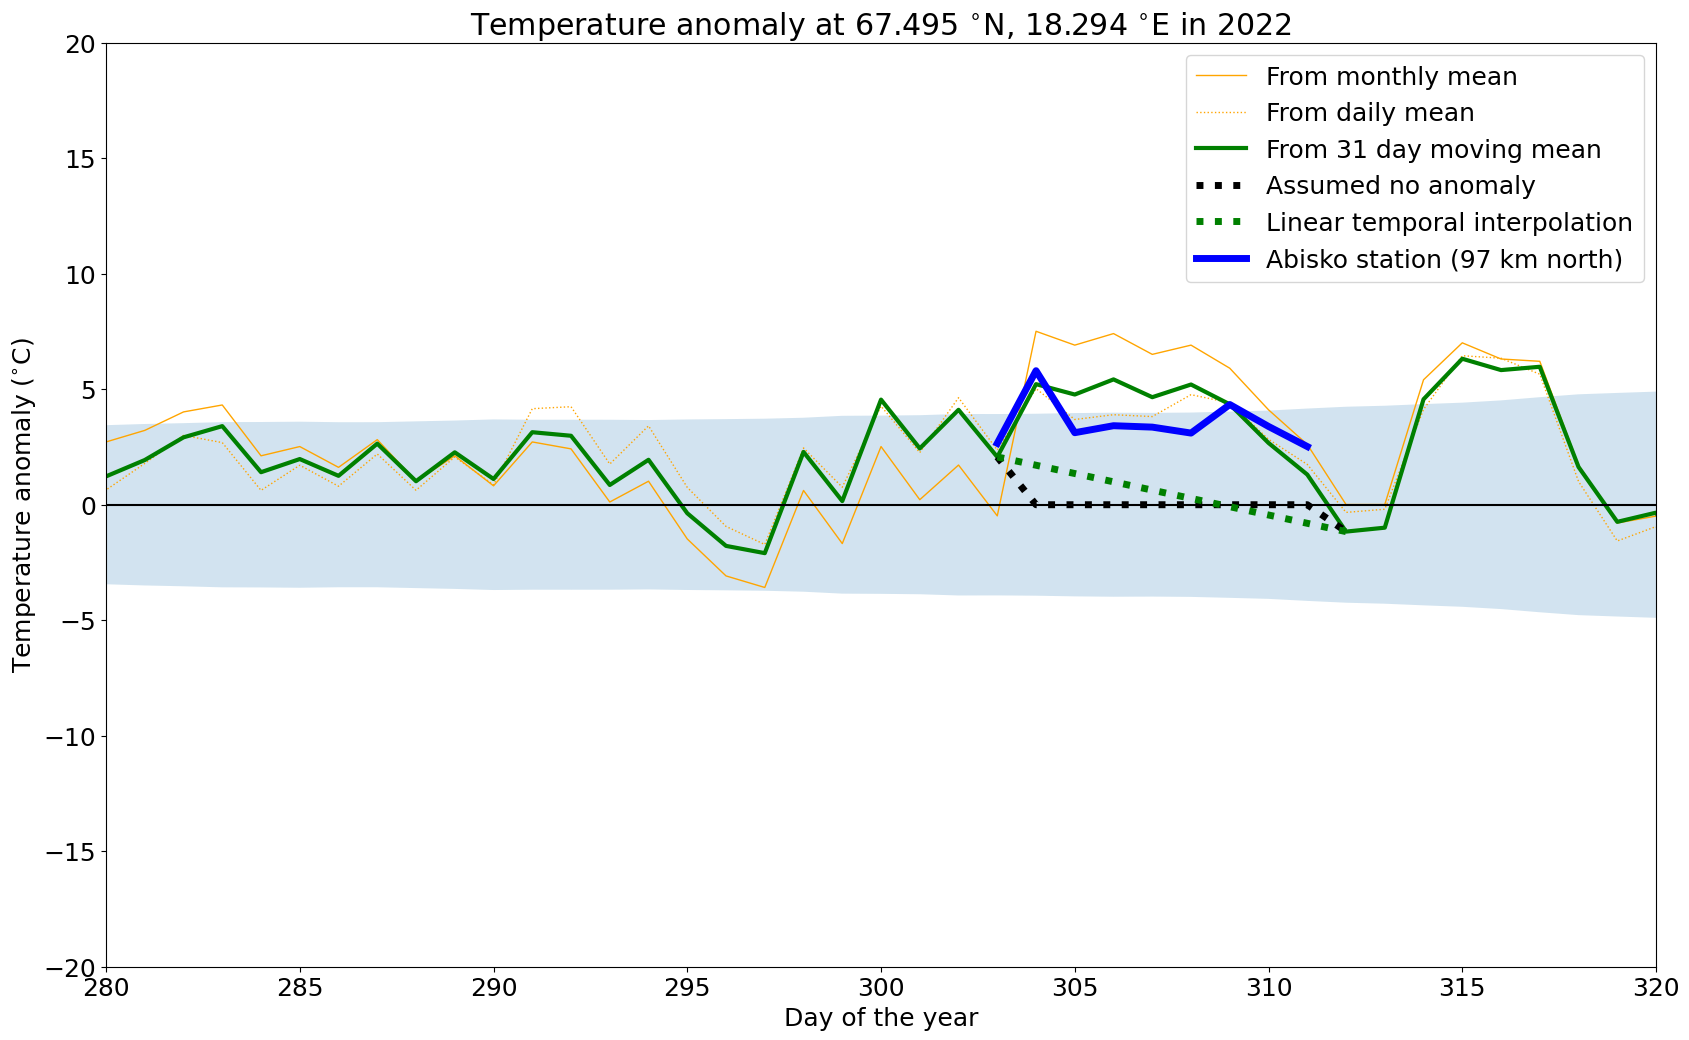

In [18]:
pl.figure(figsize=(20,12))
abisko=xr.open_dataset("Abisko_TG_obs_2021_2023.nc")

ndays_off=9
dnum1=303
dnum2=dnum1+ndays_off
pl.title("Temperature anomaly at "+str(data["lat"].values)+r" $^{\circ}$N, "+str(data["lon"].values)+r" $^{\circ}$E in "+str(np.mean(data["year"].values[last_full_year],dtype="int")))
pl.plot(data["TG"][last_full_year]-meanTGmonthly[np.int32(data["month"]-1)][last_full_year],lw=1,color="orange",label="From monthly mean")
pl.plot(data["TG"][last_full_year]-meanTGdaily,lw=1,ls=":",color="orange",label="From daily mean")
pl.plot(data["TG"][last_full_year]-data["clim_mean_TG"][data["doy"]-1][last_full_year],lw=3,color="green",label="From 31 day moving mean")
pl.plot(days,np.zeros(len(days)),color="black")
pl.plot(np.array([dnum1,dnum1+1,dnum2-1,dnum2]),np.array([data["TG"][last_full_year[dnum1]]-data["clim_mean_TG"][dnum1],0,0,data["TG"][last_full_year[dnum2]]-data["clim_mean_TG"][dnum2]]),color="black",ls=":",label="Assumed no anomaly",lw=5)
### Add file with anomalies for Ritsem on those dates!!
pl.plot(np.array([dnum1,dnum2]),np.array([data["TG"][last_full_year[dnum1]]-data["clim_mean_TG"][dnum1],data["TG"][last_full_year[dnum2]]-data["clim_mean_TG"][dnum2]]),color="green",ls=":",label="Linear temporal interpolation",lw=5)
pl.plot(np.arange(dnum1,dnum2),abisko["TG_anom"][last_full_year[dnum1:dnum2]],color="blue",label="Abisko station (97 km north)",lw=5)
pl.ylabel(r"Temperature anomaly ($^{\circ}$C)")
pl.xlabel("Day of the year")
pl.ylim(-20,20)
pl.xlim(280,320)
pl.fill_between(days,data["clim_sigma_TG"][data["doy"]-1][last_full_year],-data["clim_sigma_TG"][data["doy"]-1][last_full_year],alpha=0.2)
pl.legend()

**Question 8** 
Discuss the quality of the different gapfilling methods, their strengths and their problems. 

**Question 9** 
What do you see if you place the gap differently, which means not from day 303 until 312? You can try this by adjusting the code and reproducing the plot!!

**Bonus question** 
What have we done to February 29th, which does not occur every year?

In actual research that focuses on gap filling, or homogenization issues, more complicated methods to map measurement anomalies from one station to another are often used. Think of, for instance, methods taking correlations among variables into account (such as aspects of wind and temperature), or quantile remapping that projects one distribution onto another. Often, this leads to slight improvements of some aspects of the measurement series. Advanced statistical knowledge may be of large practical benefit in such cases. 

Such methods also lead to improved assessments of the impact of feedbacks, such as that of dynamics and circulation onto climate change trends. However, how relevant an investment in such methods is, depends on the exact question that is answered. 